In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from keras.datasets import mnist

Using TensorFlow backend.


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

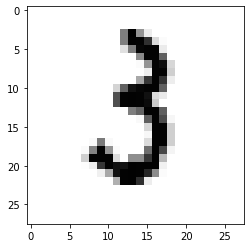

In [4]:
plt.imshow(x_train[1234], cmap = "Greys")

In [5]:
y_train[1234]

3

In [6]:
x_train[1234].shape
# 矩陣

(28, 28)

In [7]:
# CNN要(28, 28, 1) 
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [8]:
from keras.utils import np_utils

In [9]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [10]:
y_train[1234]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [11]:
x_train = x_train/255
x_test = x_test/255

####

* 3次conv, 3次 max
* 2 Dense
* output 10

filter 大小 3X3
max pooling 2X2
* Conv01: 4(filter 個數)
* Conv02: 8
* Conv03: 16

* 17
* 33


In [12]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers import Conv2D, MaxPool2D
from keras.optimizers import SGD

In [34]:
model = Sequential()

In [35]:
model.add(Conv2D(4, (3, 3), padding='same', input_shape=(28, 28, 1),
                activation='relu'))

In [36]:
model.add(MaxPool2D(pool_size=(2,2)))

In [37]:
model.add(Conv2D(8, (3, 3), padding='same',
                activation='relu'))

In [38]:
model.add(MaxPool2D(pool_size=(2,2)))

In [39]:
model.add(Conv2D(16, (3, 3), padding='same',
                activation='relu'))

In [40]:
model.add(MaxPool2D(pool_size=(2,2)))

送一般神經網路

In [41]:
model.add(Flatten())
model.add(Dense(17, activation='relu'))

In [42]:
model.add(Dense(33, activation='relu'))

# output

In [43]:
model.add(Dense(10, activation='softmax'))

In [44]:
model.compile(loss='mse', optimizer=SGD(lr=1), metrics=['accuracy'])

In [45]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 4)         40        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 4)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 8)         296       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 16)          1168      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 3, 3, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 144)               0         
__________

In [46]:
3*3*4 +4

40

In [47]:
3*3*8*4 +8

#矩陣大小28*28 
#第二層就會送出四張矩陣
#一共有8個filter
#加上8個bias

296

In [48]:
model.fit(x_train, y_train, batch_size=100, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 19s 310us/step - loss: 0.0794 - acc: 0.3388
Epoch 2/10
60000/60000 [==============================] - 20s 329us/step - loss: 0.0182 - acc: 0.8758
Epoch 3/10
60000/60000 [==============================] - 20s 337us/step - loss: 0.0087 - acc: 0.9431
Epoch 4/10
60000/60000 [==============================] - 22s 366us/step - loss: 0.0066 - acc: 0.9567
Epoch 5/10
60000/60000 [==============================] - 20s 333us/step - loss: 0.0058 - acc: 0.9625
Epoch 6/10
60000/60000 [==============================] - 17s 289us/step - loss: 0.0050 - acc: 0.9678
Epoch 7/10
60000/60000 [==============================] - 17s 288us/step - loss: 0.0045 - acc: 0.9712
Epoch 8/10
60000/60000 [==============================] - 18s 303us/step - loss: 0.0040 - acc: 0.9746
Epoch 9/10
60000/60000 [==============================] - 20s 325us/step - loss: 0.0038 - acc: 0.9755
Epoch 10/10
60000/60000 [==============================] - 21s 343us/step - loss: 

In [49]:
score = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 123us/step


In [50]:
print(f'測試資料的 loss: {score[0]:.5f}')
print(f'測試資料的正確率: {score[1]}')

測試資料的 loss: 0.00335
測試資料的正確率: 0.978


In [51]:
model.save('myCNN.h5')

In [52]:
del model

In [53]:
from keras.models import load_model

In [54]:
model = load_model('myCNN.h5')

In [55]:
predict = model.predict_classes(x_test)

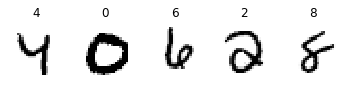

In [56]:
pick = np.random.randint(1,9999, 5)

for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(x_test[pick[i]].reshape(28,28), cmap='Greys')
    plt.title(predict[pick[i]])
    plt.axis("off")